In [72]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [73]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [74]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [75]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


# Instantiate the StandardScaler
scaler = StandardScaler()



In [76]:
market_data_df.columns.to_list()

['price_change_percentage_24h',
 'price_change_percentage_7d',
 'price_change_percentage_14d',
 'price_change_percentage_30d',
 'price_change_percentage_60d',
 'price_change_percentage_200d',
 'price_change_percentage_1y']

In [77]:
market_data_stocks_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h',
 'price_change_percentage_7d',
 'price_change_percentage_14d',
 'price_change_percentage_30d',
 'price_change_percentage_60d',
 'price_change_percentage_200d',
 'price_change_percentage_1y']])

In [78]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step
market_data_stocks_scaled = pd.DataFrame(
    market_data_stocks_scaled,
    columns=['price_change_percentage_24h',
 'price_change_percentage_7d',
 'price_change_percentage_14d',
 'price_change_percentage_30d',
 'price_change_percentage_60d',
 'price_change_percentage_200d',
 'price_change_percentage_1y']
)

# Create a Ticker column in the df_stocks_scaled DataFrame
# using the index of the original df_stocks DataFrame
market_data_stocks_scaled["coin_id"] = market_data_df.index

# Set the newly created Ticker column as index of the df_stocks_scaled DataFrame
market_data_stocks_scaled = market_data_stocks_scaled.set_index("coin_id")

# Review the DataFrame
market_data_stocks_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [79]:

# Create a DataFrame with the scaled data
# market_data_stocks_scaled = pd.DataFrame(
#     market_data_df,
#     columns=["coin_id"]
# )

 #market_data_stocks_scaled = StandardScaler

# Copy the crypto names from the original data
#scaled_data_df['bitcoin','ethereum','tether','ripple','bitcoin-cash','binancecoin','chainlink','cardano','litecoin','bitcoin-cash-sv'] = market_data_df['bitcoin','ethereum','tether','ripple','bitcoin-cash','binancecoin','chainlink','cardano','litecoin','bitcoin-cash-sv']


# Set the coinid column as index
# market_data_stocks_scaled["coin_id"] = market_data_df.index

# market_data_stocks_scaled = market_data_stocks_scaled.set_index("coin_id")


# # Display sample data
# display(market_data_stocks_scaled)

### Find the Best Value for k Using the Original Scaled DataFrame.

In [80]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)

# 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(market_data_stocks_scaled)

# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
display(elbow_df)

c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

,k_values,inertia_values
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,52.933559
6,7,45.760423
7,8,36.850091
8,9,32.415607
9,10,28.633126


c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

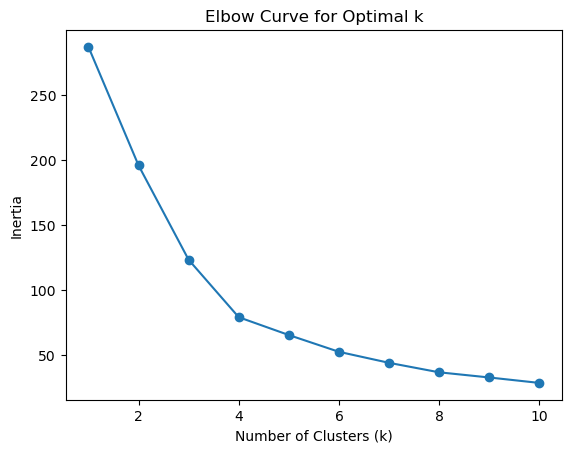

In [81]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Create an empty list to store the inertia values
inertia_values = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(market_data_stocks_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [82]:
# Initialize the K-Means model using the best value for k
# best_kmeans_model = KMeans(n_clusters=best_k)
model = KMeans(n_clusters=2, n_init='auto', random_state=1)


In [83]:
# Fit the K-Means model using the scaled data
model.fit(market_data_stocks_scaled)

c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=1)

In [84]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = model.predict(market_data_stocks_scaled)

# View the resulting array of cluster values.
display(predicted_clusters)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [85]:
# Create a copy of the DataFrame
copied_data_df = market_data_stocks_scaled.copy()

In [86]:
# Add a new column to the DataFrame with the predicted clusters
copied_data_df['predicted_clusters'] = predicted_clusters

# Display sample data
display(copied_data_df)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


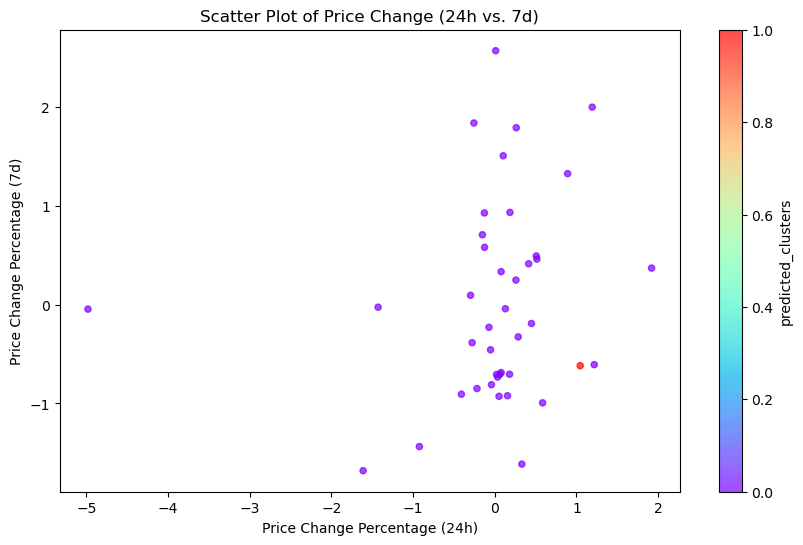

In [87]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

copied_data_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="predicted_clusters", colormap="rainbow", alpha=0.7, figsize=(10, 6))
# Set plot title and labels
plt.title('Scatter Plot of Price Change (24h vs. 7d)')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')

# Show the plot
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [88]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [89]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
reduced_data = pca_model.fit_transform(market_data_stocks_scaled)

#create df from reduced data
reduced_data_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
display(reduced_data_df.head())


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [90]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca_model.explained_variance_ratio_

# Display the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Explained Variance for PC{i + 1}: {ratio:.4f}')

# Display the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print('\nCumulative Explained Variance:')
for i, cumulative_ratio in enumerate(cumulative_explained_variance):
    print(f'PC{i + 1}: {cumulative_ratio:.4f}')

Explained Variance for PC1: 0.3720
Explained Variance for PC2: 0.3470
Explained Variance for PC3: 0.1760

Cumulative Explained Variance:
PC1: 0.3720
PC2: 0.7190
PC3: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [91]:
copied_data_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [92]:
copied_data_df.columns.to_list()

['price_change_percentage_24h',
 'price_change_percentage_7d',
 'price_change_percentage_14d',
 'price_change_percentage_30d',
 'price_change_percentage_60d',
 'price_change_percentage_200d',
 'price_change_percentage_1y',
 'predicted_clusters']

In [93]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_data_df = reduced_data_df.copy()

# Creating a DataFrame with the PCA data
#pca_data_df['coin_id'] = pd.DataFrame(index=copied_data_df.index.copy())
pca_data_df.index = copied_data_df.index
# # Copy the crypto names from the original data
# pca_data_df['coin_id'] = copied_data_df['coin_id']

# # Set the coinid column as index
# pca_data_df.set_index('coin_id', inplace=True)


# Display sample data
display(pca_data_df)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [94]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
# 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_data_df)

# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
display(elbow_df)

c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

,k_values,inertia_values
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.134056
7,8,17.294777
8,9,13.719376
9,10,10.484890


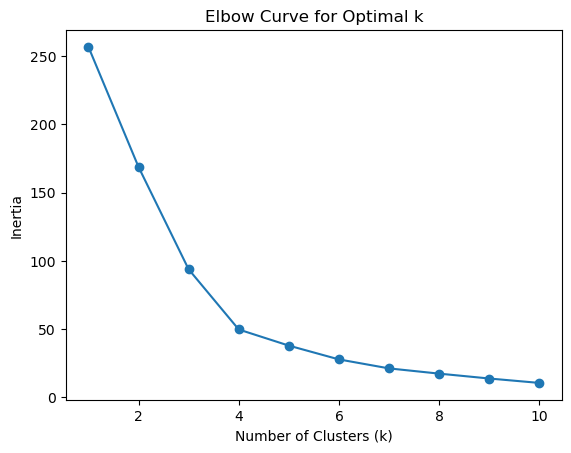

In [95]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [96]:
# Initialize the K-Means model using the best value for k
import sklearn
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, n_init='auto', random_state=1)


In [97]:
# Fit the K-Means model using the PCA data
model.fit(pca_data_df)

c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=1)

In [98]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = model.predict(pca_data_df)


# Print the resulting array of cluster values.
display(predicted_clusters_pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [99]:
# Create a copy of the DataFrame with the PCA data
pca_data_copy = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_copy['predicted_clusters'] = predicted_clusters_pca

# Display sample data
display(pca_data_copy)

,PC1,PC2,PC3,predicted_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


c:\Users\mckal\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='PC1', ylabel='PC2'>

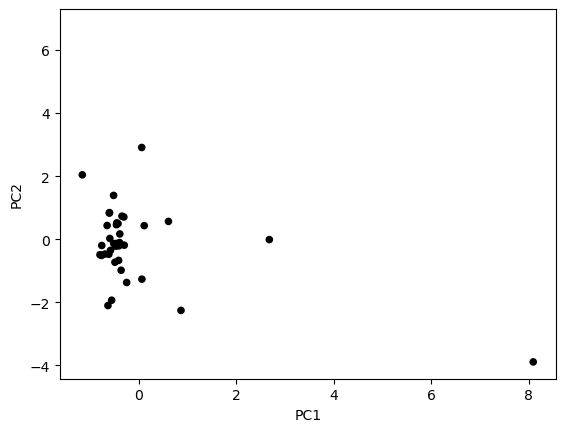

In [105]:
# Convert the 'predicted_clusters' column to string type
pca_data_copy['predicted_clusters'] = pca_data_copy['predicted_clusters'].astype(str)

# Remove 'c=' prefix from the values in 'predicted_clusters' column
pca_data_copy['predicted_clusters'] = pca_data_copy['predicted_clusters'].str.replace('c=', '')

# Create scatter plot
pca_data_copy.plot.scatter(
    x="PC1", 
    y="PC2",
    c="predicted_clusters",
    colormap='spring'
)


In [112]:
# pca_data_copy['predicted_clusters'] = pca_data_copy['predicted_clusters'].str.replace('c=', '')

# pca_data_copy.plot.scatter(
#     x="PC1", 
#     y="PC2",
#     c="predicted_clusters",
#     colormap='spring')

In [111]:
import hvplot.pandas

# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca_data_copy.hvplot.scatter(x='PC1', y='PC2', c='predicted_clusters', cmap='viridis', legend='bottom_right')

# Display the plot
scatter_plot

:Scatter   [PC1]   (PC2,predicted_clusters)

### Determine the Weights of Each Feature on each Principal Component

In [114]:
# Use the columns from the original scaled DataFrame as the index.
pca_data_copy.set_index(market_data_stocks_scaled.columns, inplace=True)

# Display the DataFrame with the new index
display(pca_data_copy)

ValueError: Length mismatch: Expected 41 rows, received array of length 7

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    